<a href="https://colab.research.google.com/github/SprihaPodder/AISCResearchComponent/blob/main/AISCresearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Upgrade pip and build tools first
!pip install --upgrade pip setuptools wheel

# Clone the Argoverse API repo
!git clone https://github.com/argoverse/av2-api.git
%cd av2-api

# Install Argoverse API
!pip install -e .

# Install other dependencies preferring prebuilt wheels
!pip install --prefer-binary scikit-fuzzy numpy matplotlib torch torchvision

# Optional: For any stubborn package replace 'some_package' with actual package name or remove if not needed
!MAX_JOBS=4 pip install -v --no-build-isolation some_package



fatal: destination path 'av2-api' already exists and is not an empty directory.
/content/av2-api
Obtaining file:///content/av2-api
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Installing backend dependencies ... done
  Preparing editable metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 56.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 137.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 156.2 MB/s  0:00:00
  Building editable for av2 (pyproject.toml) ... done
  Created wheel for av2: filename=av2-0.3.5-cp312-cp312-linux_x86_64.whl size=5162 sha256=c60e7a10d55e85e25ce25089402345d1109fa2c604849d989b10e9a1dd5eb233
  Stored in directory: /tmp/pip-ephem-wheel-cache-pbkprq5m/wheels/5d/39/b2/a825a2ebc5e12d36c72437a1f0bbef1c5d

In [2]:
# # Remove the locally cloned repository and install the package directly
# !rm -rf av2-api
# !pip install av2

%cd ..

/content


In [3]:
!pip install av2

In [4]:
# Start in root folder, not inside av2-api
!git clone https://github.com/argoverse/av2-api.git
%cd av2-api
!pip install .
%cd ..

fatal: destination path 'av2-api' already exists and is not an empty directory.
/content/av2-api
Processing /content/av2-api
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for av2: filename=av2-0.3.5-cp312-cp312-linux_x86_64.whl size=15041199 sha256=327e09d4f8d1fb08bfa0bbd2cc165205422bae0be774b228f5aa1a4445f3c0c3
  Stored in directory: /root/.cache/pip/wheels/5d/39/b2/a825a2ebc5e12d36c72437a1f0bbef1c5d4c071a5102756120
Successfully built av2
  Attempting uninstall: av2
    Found existing installation: av2 0.3.5
    Uninstalling av2-0.3.5:
      Successfully uninstalled av2-0.3.5
/content


In [5]:
!pip install scikit-fuzzy


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from av2.datasets.motion_forecasting import scenario_serialization
from av2.datasets.motion_forecasting.data_schema import ArgoverseScenario
from av2.datasets.motion_forecasting.viz.scenario_visualization import visualize_scenario
from av2.map.map_api import ArgoverseStaticMap
import urllib.request, io, tempfile

In [7]:
# # Load one public scenario sample (example via GitHub mirror or Argoverse-hosted sample)
# sample_url = "https://github.com/argoverse/av2-api/raw/main/tests/test_scenarios/1/scenario.json"
# with urllib.request.urlopen(sample_url) as f:
#     json_bytes = f.read()

# # Temporarily write and parse for analysis (ArgoverseScenario parsing)
# temp_json = tempfile.NamedTemporaryFile(delete=False, suffix='.json')
# temp_json.write(json_bytes)
# temp_json.close()

# scenario_data = scenario_serialization.load_argoverse_scenario_parquet(temp_json.name)
# print("Scenario loaded successfully:", isinstance(scenario_data, ArgoverseScenario))

# import urllib.request
# import tempfile
# from av2.datasets.motion_forecasting import scenario_serialization

# Download sample scenario parquet file
# sample_url = "https://github.com/argoverse/av2-api/tree/6b22766247eda941cb1953d6a58e8d5631c561da/tests/unit/test_data/forecasting_scenarios/0a1e6f0a-1817-4a98-b02e-db8c9327d151/scenario_0a1e6f0a-1817-4a98-b02e-db8c9327d151.parquet"
sample_url = "https://github.com/argoverse/av2-api/raw/6b22766247eda941cb1953d6a58e8d5631c561da/tests/unit/test_data/forecasting_scenarios/0a1e6f0a-1817-4a98-b02e-db8c9327d151/scenario_0a1e6f0a-1817-4a98-b02e-db8c9327d151.parquet"

tmp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".parquet")
urllib.request.urlretrieve(sample_url, tmp_file.name)

# Load scenario using Argoverse API
scenario_data = scenario_serialization.load_argoverse_scenario_parquet(tmp_file.name)




In [8]:
print(scenario_data)

ArgoverseScenario(scenario_id='0a1e6f0a-1817-4a98-b02e-db8c9327d151', timestamps_ns=array([3.15986559e+17, 3.15986560e+17, 3.15986560e+17, 3.15986560e+17,
       3.15986560e+17, 3.15986560e+17, 3.15986560e+17, 3.15986560e+17,
       3.15986560e+17, 3.15986560e+17, 3.15986560e+17, 3.15986561e+17,
       3.15986561e+17, 3.15986561e+17, 3.15986561e+17, 3.15986561e+17,
       3.15986561e+17, 3.15986561e+17, 3.15986561e+17, 3.15986561e+17,
       3.15986561e+17, 3.15986562e+17, 3.15986562e+17, 3.15986562e+17,
       3.15986562e+17, 3.15986562e+17, 3.15986562e+17, 3.15986562e+17,
       3.15986562e+17, 3.15986562e+17, 3.15986562e+17, 3.15986563e+17,
       3.15986563e+17, 3.15986563e+17, 3.15986563e+17, 3.15986563e+17,
       3.15986563e+17, 3.15986563e+17, 3.15986563e+17, 3.15986563e+17,
       3.15986563e+17, 3.15986564e+17, 3.15986564e+17, 3.15986564e+17,
       3.15986564e+17, 3.15986564e+17, 3.15986564e+17, 3.15986564e+17,
       3.15986564e+17, 3.15986564e+17, 3.15986564e+17, 3.1598656

In [9]:
# Unique scenario ID
print("Scenario ID:", scenario_data.scenario_id)

# Number of timestamps
print("Timestamps count:", len(scenario_data.timestamps_ns))

# Number of tracks (observed agents)
print("Number of tracks:", len(scenario_data.tracks))

# Access one track and print details
track = scenario_data.tracks[0]
print("Track ID:", track.track_id)
print("Object type:", track.object_type)
print("Track category:", track.category)

# Print positions and velocities for first few states in this track
for state in track.object_states[:5]:
    print(f"Time step {state.timestep}: Position={state.position}, Velocity={state.velocity}, Heading={state.heading}")

Scenario ID: 0a1e6f0a-1817-4a98-b02e-db8c9327d151
Timestamps count: 110
Number of tracks: 58
Track ID: 138902
Object type: ObjectType.VEHICLE
Track category: TrackCategory.TRACK_FRAGMENT
Time step 0: Position=(-436.0898832937501, 1311.1898651654426), Velocity=(-0.7235987082457296, 2.3575063810512873), Heading=1.9238037325219834
Time step 1: Position=(-436.1772911895289, 1311.3156984193183), Velocity=(-0.796912363080065, 2.3077003115072734), Heading=1.9496622479163561
Time step 2: Position=(-436.2866418143134, 1311.4633930327818), Velocity=(-0.8704790874462199, 2.2577223176644403), Heading=1.980503954812712
Time step 3: Position=(-436.42148527881966, 1311.6328331722668), Velocity=(-0.9402769035722257, 2.1759040461864028), Heading=2.016651720013647
Time step 4: Position=(-436.5776365126688, 1311.8204483903685), Velocity=(-1.0766478413276308, 2.092458244621817), Heading=2.056855404718748


In [10]:
# Define fuzzy control system
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
speed = ctrl.Antecedent(np.arange(0, 121, 1), 'speed')
visibility = ctrl.Antecedent(np.arange(0, 10, 1), 'visibility')
brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')

# Define fuzzy sets
distance['close'] = fuzz.trimf(distance.universe, [0, 0, 30])
distance['medium'] = fuzz.trimf(distance.universe, [20, 50, 80])
distance['far'] = fuzz.trimf(distance.universe, [60, 100, 100])

speed['low'] = fuzz.trimf(speed.universe, [0, 0, 60])
speed['medium'] = fuzz.trimf(speed.universe, [40, 80, 120])
speed['high'] = fuzz.trimf(speed.universe, [100, 120, 120])

visibility['low'] = fuzz.trimf(visibility.universe, [0, 0, 4])
visibility['medium'] = fuzz.trimf(visibility.universe, [3, 5, 7])
visibility['high'] = fuzz.trimf(visibility.universe, [6, 10, 10])

brake['light'] = fuzz.trimf(brake.universe, [0, 0, 30])
brake['moderate'] = fuzz.trimf(brake.universe, [20, 50, 80])
brake['strong'] = fuzz.trimf(brake.universe, [70, 100, 100])

# Fuzzy rules
rule1 = ctrl.Rule(distance['close'] & speed['high'], brake['strong'])
rule2 = ctrl.Rule(distance['medium'] & speed['medium'], brake['moderate'])
rule3 = ctrl.Rule(distance['far'] & visibility['high'], brake['light'])
rule4 = ctrl.Rule(visibility['low'] & speed['high'], brake['strong'])

brake_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
brake_sim = ctrl.ControlSystemSimulation(brake_ctrl)

In [12]:
# import numpy as np
# import skfuzzy as fuzz
# from skfuzzy import control as ctrl
# from av2.datasets.motion_forecasting.data_schema import ObjectType

# # Define fuzzy variables
# distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')
# speed = ctrl.Antecedent(np.arange(0, 121, 1), 'speed')
# visibility = ctrl.Antecedent(np.arange(0, 10, 1), 'visibility')
# brake = ctrl.Consequent(np.arange(0, 101, 1), 'brake')

# # Membership functions
# distance['close'] = fuzz.trimf(distance.universe, [0, 0, 30])
# distance['medium'] = fuzz.trimf(distance.universe, [20, 50, 80])
# distance['far'] = fuzz.trimf(distance.universe, [60, 100, 100])

# speed['low'] = fuzz.trimf(speed.universe, [0, 0, 60])
# speed['medium'] = fuzz.trimf(speed.universe, [40, 80, 120])
# speed['high'] = fuzz.trimf(speed.universe, [100, 120, 120])

# visibility['low'] = fuzz.trimf(visibility.universe, [0, 0, 4])
# visibility['medium'] = fuzz.trimf(visibility.universe, [3, 5, 7])
# visibility['high'] = fuzz.trimf(visibility.universe, [6, 10, 10])

# brake['light'] = fuzz.trimf(brake.universe, [0, 0, 30])
# brake['moderate'] = fuzz.trimf(brake.universe, [20, 50, 80])
# brake['strong'] = fuzz.trimf(brake.universe, [70, 100, 100])

# # Fuzzy rules (with more coverage to catch all inputs)
# rule1 = ctrl.Rule(distance['close'] & speed['high'], brake['strong'])
# rule2 = ctrl.Rule(distance['medium'] & speed['medium'], brake['moderate'])
# rule3 = ctrl.Rule(distance['far'] & visibility['high'], brake['light'])
# rule4 = ctrl.Rule(visibility['low'] & speed['high'], brake['strong'])
# rule5 = ctrl.Rule(distance['far'] & speed['low'], brake['light'])  # catch distant & slow
# rule6 = ctrl.Rule(speed['low'], brake['light'])                   # default for low speed

# brake_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6])
# brake_sim = ctrl.ControlSystemSimulation(brake_ctrl)

# Vehicle processing loop
for actor in scenario_data.tracks:
    if actor.object_type == ObjectType.VEHICLE:
        for state in actor.object_states[:5]:  # limit to first 5 if demo
            v_x, v_y = state.velocity
            speed_val = np.sqrt(v_x**2 + v_y**2)
            # Placeholder: use fixed distance, can use scene geometry later
            distance_val = 25  # meters, can compute between tracks
            visibility_val = 7  # placeholder value for demo

            # Clamp values safely in fuzzy input range
            distance_val = max(0, min(100, distance_val))
            speed_val = max(0, min(120, speed_val))
            visibility_val = max(0, min(9, visibility_val))

            print('Inputs -> distance:', distance_val, 'speed:', speed_val, 'visibility:', visibility_val)
            brake_sim.input['distance'] = distance_val
            brake_sim.input['speed'] = speed_val
            brake_sim.input['visibility'] = visibility_val
            brake_sim.compute()

            output_keys = list(brake_sim.output.keys())
            print("Output keys available:", output_keys)

            if 'brake' in output_keys:
                print(f"Track ID {actor.track_id}, Timestep {state.timestep}: Brake force -> {brake_sim.output['brake']:.2f}")
            else:
                print("No fuzzy output—verify rules/membership coverage and input ranges.")

        break   # Only the first vehicle for demo, remove for all vehicles


Inputs -> distance: 25 speed: 2.46605584431343 visibility: 7
Output keys available: []
No fuzzy output—verify rules/membership coverage and input ranges.
Inputs -> distance: 25 speed: 2.441423773571606 visibility: 7
Output keys available: []
No fuzzy output—verify rules/membership coverage and input ranges.
Inputs -> distance: 25 speed: 2.4197197989356733 visibility: 7
Output keys available: []
No fuzzy output—verify rules/membership coverage and input ranges.
Inputs -> distance: 25 speed: 2.3703753022679197 visibility: 7
Output keys available: []
No fuzzy output—verify rules/membership coverage and input ranges.
Inputs -> distance: 25 speed: 2.3532003908977375 visibility: 7
Output keys available: []
No fuzzy output—verify rules/membership coverage and input ranges.


Number of tracks: 58
First track sample positions (first 5 timesteps):
(-436.0898832937501, 1311.1898651654426)
(-436.1772911895289, 1311.3156984193183)
(-436.2866418143134, 1311.4633930327818)
(-436.42148527881966, 1311.6328331722668)
(-436.5776365126688, 1311.8204483903685)


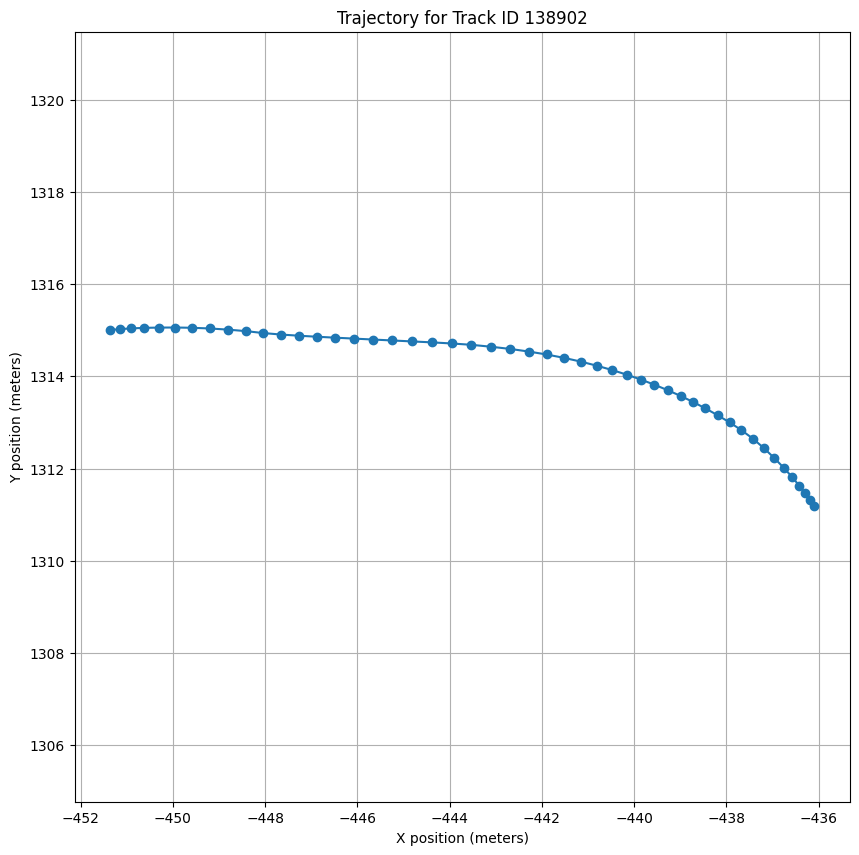

In [29]:
import urllib.request
import tempfile
from av2.datasets.motion_forecasting import scenario_serialization
from av2.map.map_api import ArgoverseStaticMap
from av2.datasets.motion_forecasting.viz.scenario_visualization import visualize_scenario

from pathlib import Path
import os
import io
from base64 import b64encode
from IPython.display import HTML

import matplotlib.pyplot as plt


# --- Download scenario parquet ---
scenario_url = "https://github.com/argoverse/av2-api/raw/6b22766247eda941cb1953d6a58e8d5631c561da/tests/unit/test_data/forecasting_scenarios/0a1e6f0a-1817-4a98-b02e-db8c9327d151/scenario_0a1e6f0a-1817-4a98-b02e-db8c9327d151.parquet"
tmp_scenario = tempfile.NamedTemporaryFile(delete=False, suffix=".parquet")
urllib.request.urlretrieve(scenario_url, tmp_scenario.name)
scenario_data = scenario_serialization.load_argoverse_scenario_parquet(tmp_scenario.name)

# --- Download static map JSON ---
map_url = "https://github.com/argoverse/av2-api/raw/main/tests/unit/test_data/forecasting_scenarios/0a1e6f0a-1817-4a98-b02e-db8c9327d151/log_map_archive_0a1e6f0a-1817-4a98-b02e-db8c9327d151.json"
tmp_map = tempfile.NamedTemporaryFile(delete=False, suffix=".json")
urllib.request.urlretrieve(map_url, tmp_map.name)

# Rename the tempfile to include 'log_map_archive_' as required by ArgoverseStaticMap
new_map_path = tmp_map.name.replace(".json", "_log_map_archive_example.json")
os.rename(tmp_map.name, new_map_path)

scenario_static_map = ArgoverseStaticMap.from_json(Path(new_map_path))

# Define path to save the visualization video
save_path = Path(tempfile.gettempdir()) / "scenario_visualization.mp4"

# Visualize scenario and save video to save_path
visualize_scenario(scenario_data, scenario_static_map, save_path=save_path)

# Function to display video inline in Colab
def display_video(path):
    video = io.open(str(path), 'rb').read()
    video_encoded = b64encode(video).decode('ascii')
    return HTML(f'''
    <video width=600 controls>
        <source src="video/mp4;base64,{video_encoded}" type="video/mp4">
    </video>
    ''')

# Display the visualization video inline
display_video(save_path)

print("Number of tracks:", len(scenario_data.tracks))
print("First track sample positions (first 5 timesteps):")
for state in scenario_data.tracks[0].object_states[:5]:
    print(state.position)



# Visualize only scenario trajectories without static map

track = scenario_data.tracks[0]  # Get first track (vehicle)

positions = [state.position for state in track.object_states]
x = [pos[0] for pos in positions]
y = [pos[1] for pos in positions]

plt.figure(figsize=(10, 10))
plt.plot(x, y, marker='o')
plt.title(f"Trajectory for Track ID {track.track_id}")
plt.xlabel("X position (meters)")
plt.ylabel("Y position (meters)")
plt.grid(True)
plt.axis('equal')
plt.show()



In [30]:
import json

with open(new_map_path, 'r') as f:
    map_data = json.load(f)
print(map_data.keys())


dict_keys(['drivable_areas', 'lane_segments', 'pedestrian_crossings'])


In [31]:
# Hypothetical payoff-based safety-comfort cost tradeoff
def fuzzy_game_equilibrium(safety_a, safety_b):
    # Fuzzy uncertainty factor causes nonlinear strategy choice
    if abs(safety_a - safety_b) < 10:
        return "Both Slow Down (Cooperative Equilibrium)"
    elif safety_a < safety_b:
        return "Yield to Other Vehicle"
    else:
        return "Proceed with Caution"

print(fuzzy_game_equilibrium(70, 65))

Both Slow Down (Cooperative Equilibrium)
